In [2]:
from __future__ import print_function, division

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import thinkdsp
import thinkplot
import thinkstats2 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

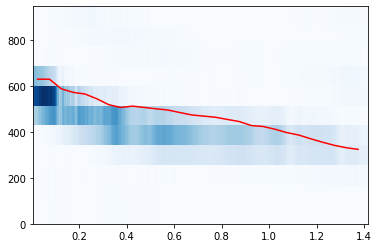

In [4]:
"""
Exercise 5.2
"""
#Tried implementing with numpy...no author-based functions.
def estimate_freq(segment):
    corrs = np.correlate(segment.ys,segment.ys,'same') #autocorrelate segment with itself
    N = len(corrs) #get length of corrs
    lengths = range(N,N//2,-1) #get points from N//2 to N aka positive lags
    half = corrs[N//2:N].copy() #get autocorrelations from N//2 to N...make a new place in memory 
    half /= lengths #correct for unstandardized autocorr...as lag increases, there's less overlap (fewer points)
    half /= half[0] #Normalize amplitudes
    low = 70
    high = 150
    lag = np.array(corrs[low:high]).argmax() + low #get peak...we'll try this
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

wave = thinkdsp.read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()

step = 0.05
starts = np.arange(0.0, 1.4, step)
duration = 0.01
ts = []
freqs = []

for start in starts:
    ts.append(start + step/2) #midpoint of each segment
    segment = wave.segment(start=start, duration=duration)
    freq = estimate_freq(segment)
    freqs.append(freq)
freqs.reverse() 
#I maybe wrong...but I'm wondering if 
#np.correlate gives you a time-reversed autocorrelation
#im not convinced.
spectro = wave.make_spectrogram(512)
spectro.plot(high=1000)
plt.plot(ts, freqs, color = 'red')
plt.show()
#ehh......

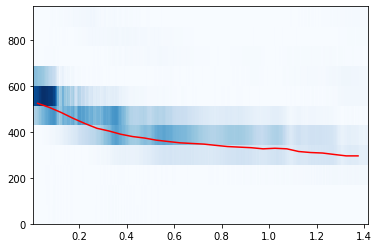

In [5]:
"""
Exercise 5.2
"""
#looked at authors solution to compare...
def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2, ddof=0)[0, 1]
    return corr

def autocorr(wave):
    """Computes and plots the autocorrelation function.

    wave: Wave
    """
    lags = range(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

def estimate_freq(segment):
    lags, corrs  = autocorr(segment)
    low, high = 50, 150
    lag = np.array(corrs[low:high]).argmax()+low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

wave = thinkdsp.read_wave('28042__bcjordan__voicedownbew.wav')
wave.normalize()
wave.make_audio()


step = 0.05
starts = np.arange(0.0, 1.4, step)
duration = 0.01
ts = []
freqs = []

for start in starts:
    ts.append(start + step/2) #midpoint of each segment
    segment = wave.segment(start=start, duration=duration)
    freq = estimate_freq(segment)
    freqs.append(freq)
spectro = wave.make_spectrogram(512)
spectro.plot(high=1000)
plt.plot(ts, freqs, color = 'red')
#better than my attempt with straight numpy...

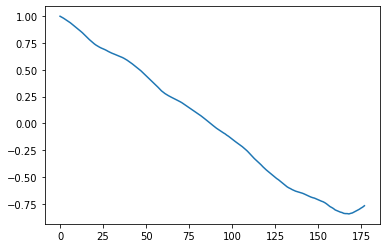

In [6]:
"""
Exercise 5.3
"""
def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2, ddof=0)[0, 1]
    return corr

def autocorr(wave):
    """Computes and plots the autocorrelation function.

    wave: Wave
    """
    lags = range(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

df = pd.read_csv("BTC_USD_2018-05-31_2019-05-31-CoinDesk.csv", usecols=['Closing Price (USD)'])

ys = df['Closing Price (USD)'].get_values()
ts = np.arange(len(ys))
#plt.plot(ts,values) #ok good
bitcoin = thinkdsp.Wave(ys,ts,framerate=1)
#bitcoin.plot()
lags,corrs = autocorr(bitcoin)
plt.plot(lags,corrs)

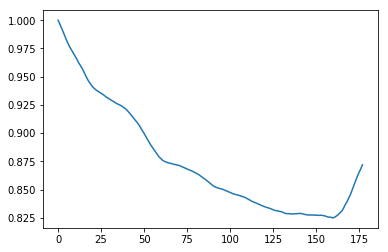

In [121]:
#Lets do it in numpy?

df = pd.read_csv("BTC_USD_2018-05-31_2019-05-31-CoinDesk.csv", usecols=['Closing Price (USD)'])

ys = df['Closing Price (USD)'].get_values()
corrs = np.correlate(ys,ys,mode='same')
N = len(corrs)
lags = range(N, N//2, -1)
pos = corrs[N//2:].copy()
pos /= lags
pos /= pos[0]
plt.plot(pos)
#... I dunno...